In [2]:
import json
import os
import subprocess
from IPython.display import clear_output
import torch.optim as optim

os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import torch 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device is", device)

device is cuda


# POMO

In [2]:
import pandas as pd
import numpy as np
import json
import os
from collections import defaultdict, deque
import pickle
from IPython import get_ipython
from tqdm.auto import tqdm
import gc
import subprocess
from IPython.display import clear_output
import matplotlib.pyplot as plt
import wandb
import pickle

/home/brandon/Projet_TER/TEST_byMe/env_pompier/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Generate Metrics

In [25]:
from functions_utils_pomo import get_metrics     

cur_path = os.getcwd()
metrics = get_metrics(cur_path)
os.chdir('./Reward_weights')
for m in metrics:

    dic_tarif_sent_disp = {"v_required": 0, 
                           "v_sent": 0, 
                           "v_sent_full": 0, 
                           "v_degraded": 0, 
                           "cancelled": 0, 
                           "function_not_found": 0, 
                           "v1_not_sent_from_s1": 0, 
                           "v3_not_sent_from_s3": 0, 
                           "v_not_found_in_last_station": 0, 
                           "ff_required": 0, 
                           "ff_sent": 0, 
                           "rupture_ff": -100, 
                           "z1_VSAV_sent": 0, 
                           "z1_FPT_sent": 0, 
                           "z1_EPA_sent": 0, 
                           "VSAV_needed": 0, 
                           "FPT_needed": 0, 
                           "EPA_needed": 0, 
                           "VSAV_disp": 0, 
                           "FPT_disp": 0, 
                           "EPA_disp": 0, 
                           "skill_lvl": 0}

    dic_tarif_sent_disp[m] = -100

    if m == 'v_degraded':
        
        dic_tarif_sent_disp['v_sent_full'] = 10


    with open(f"rw_"+ m +".json", "w") as f:
        json.dump(dic_tarif_sent_disp, f)

os.chdir("../")

## Call agent_run

In [49]:
model = "pomo"
years = "10y"
suffix = "skill_ff_v"
rwd=["skill_lvl", "ff_sent", "v_sent"]
rwd_size = 3


cmd = [
    "python3", "-u", "agent_run.py",
    "--model_name", f"agent_{model}_{years}_{suffix}",
    "--agent_model", model,
    "--hyper_params", "hyper_params.json",
    
    "--dataset", f"df_pc_fake_{years}.pkl",
    "--start", "1",
    "--end", "530880",
    "--constraint_factor_veh", "1",
    "--constraint_factor_ff", "1",
    "--save_metrics_as", f"metrics_{model}_{years}_{suffix}",
    "--eps_start","1",
    "--train",
    "--reward_weights"
]
for metrique in rwd:
    cmd.append(f"rw_{metrique}.json")
# "--train"
# "--end", "53088",
# "--load"

process = subprocess.Popen(
    cmd,
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    text=True,
    bufsize=1
)

line_count = 0
stdout_lines = deque(maxlen=5000)
for line in process.stdout:
    stdout_lines.append(line)
    line_count += 1
    if line_count % 100 == 0:
        clear_output(wait=True)

    print(line.strip())

max_train_steps 2654395
Agent pomo initialized
Train mode
/home/brandon/Projet_TER/TEST_byMe/Reward_weights
Reward weights [{'v_required': 0, 'v_sent': 0, 'v_sent_full': 0, 'v_degraded': 0, 'cancelled': 0, 'function_not_found': 0, 'v1_not_sent_from_s1': 0, 'v3_not_sent_from_s3': 0, 'v_not_found_in_last_station': 0, 'ff_required': 0, 'ff_sent': 0, 'rupture_ff': -100, 'z1_VSAV_sent': 0, 'z1_FPT_sent': 0, 'z1_EPA_sent': 0, 'VSAV_needed': 0, 'FPT_needed': 0, 'EPA_needed': 0, 'VSAV_disp': 0, 'FPT_disp': 0, 'EPA_disp': 0, 'skill_lvl': -100}, {'v_required': 0, 'v_sent': 0, 'v_sent_full': 0, 'v_degraded': 0, 'cancelled': 0, 'function_not_found': 0, 'v1_not_sent_from_s1': 0, 'v3_not_sent_from_s3': 0, 'v_not_found_in_last_station': 0, 'ff_required': 0, 'ff_sent': -100, 'rupture_ff': -100, 'z1_VSAV_sent': 0, 'z1_FPT_sent': 0, 'z1_EPA_sent': 0, 'VSAV_needed': 0, 'FPT_needed': 0, 'EPA_needed': 0, 'VSAV_disp': 0, 'FPT_disp': 0, 'EPA_disp': 0, 'skill_lvl': 0}, {'v_required': 0, 'v_sent': -100, 'v_sen

KeyboardInterrupt: 

In [45]:
os.getcwd()

'/home/brandon/Projet_TER/TEST_byMe'

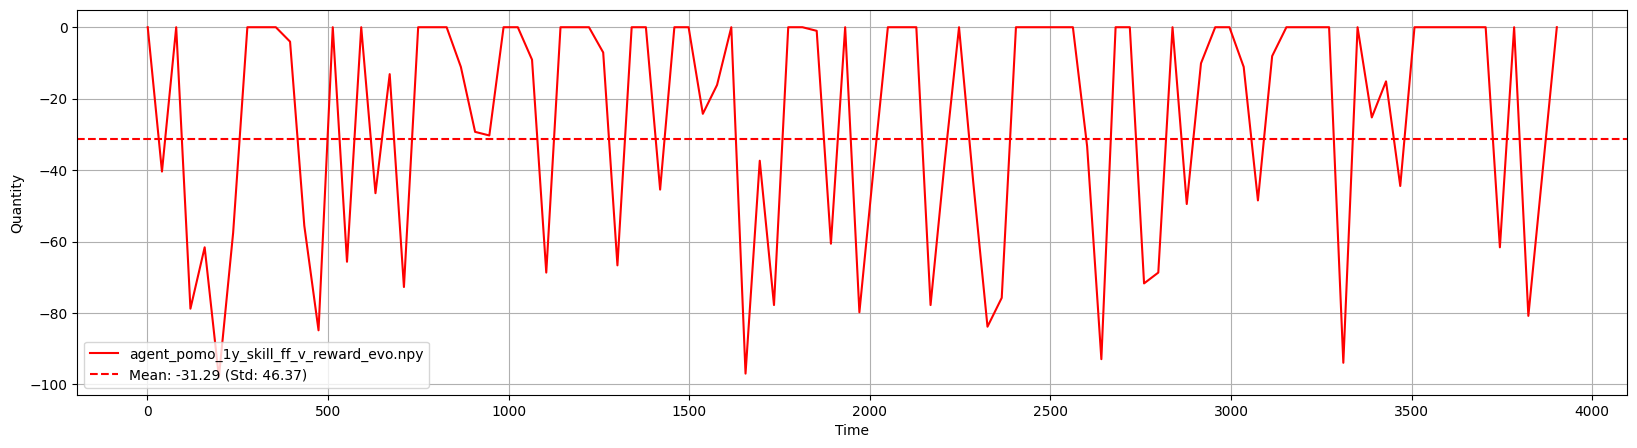

Fin du script. Tout s’est bien déroulé.


In [ ]:
file_name = f"agent_{model}_{years}_{suffix}_reward_evo.npy"
%run plot_evo.py "{file_name}" --interpolation 1000